**Importando as bibliotecas**

As principais para o começo do código

In [1]:
import mlflow
from pycaret.classification import *
import seaborn as sns
import pandas as pd

*Carregando os dados*

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Criando as funções** 

In [3]:
def resume(df):
    """
    Objective: For a given dataframe this function provides information
    regarding Missing and Unique values per column.

    Input: param df: Dataframe to check the information.

    Output: return summary: a dataframe with columns providing summary per column of the input dataframe.
    
    """
    df = df.copy()
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    summary['Uniques'] = df.nunique().values
    return summary

In [4]:
def feature_eng(dataframe):
    """
    Transform the dataframe 
    """
    dataframe = dataframe.copy()
    Ticket = dataframe['Ticket'].str.split(" ",expand=True)
    for i in range(dataframe.shape[0]):
        if Ticket.loc[i,2] != None:
            Ticket.loc[i,0] = Ticket.loc[i,0]+'_'+Ticket.loc[i,1]
            Ticket.loc[i,1] = Ticket.loc[i,2]
            Ticket.loc[i,2] = None      
        if Ticket.loc[i,1] == None and Ticket.loc[i,0] != 'LINE':
            Ticket.loc[i,1] = Ticket.loc[i,0]
            Ticket.loc[i,0] = None     
        if Ticket.loc[i,0]== 'LINE':
            Ticket.loc[i,1] = 0
            
    dataframe['Cabin'] = dataframe['Cabin'].fillna('Z00')
    Cabin = dataframe["Cabin"].str.split(" ",n=3,expand=True)
    for i in range(dataframe.shape[0]):
        if Cabin.loc[i,2] != None:
            Cabin.loc[i,3] = 3
        else:
            if Cabin.loc[i,1] != None:
                Cabin.loc[i,3] = 2
            else:
                Cabin.loc[i,3] = 1
    dataframe['Cabins'] = Cabin[3]
    dataframe['Ticket'] = Ticket[1]
    dataframe["codeTicket"] = Ticket[0]
    LastName = dataframe["Name"].str.split(",",n=1,expand=True)
    dataframe["LastName"] = LastName[0]
    dataframe["Name"] = LastName[1]
    dataframe['Ticket'] = dataframe['Ticket'].astype(int)
    dataframe['Pclass'] = dataframe['Pclass'].astype(str)
    
    
    return dataframe

In [5]:
resume(train)

Dataset Shape: (891, 12)


,Name,dtypes,Missing,Missing Percentage,Uniques
0,PassengerId,int64,0,0.000000,891
1,Survived,int64,0,0.000000,2
2,Pclass,int64,0,0.000000,3
3,Name,object,0,0.000000,891
4,Sex,object,0,0.000000,2
5,Age,float64,177,0.198653,88
6,SibSp,int64,0,0.000000,7
7,Parch,int64,0,0.000000,7
8,Ticket,object,0,0.000000,681
9,Fare,float64,0,0.000000,248


In [6]:
train = feature_eng(train)

In [7]:
resume(train)

Dataset Shape: (891, 15)


,Name,dtypes,Missing,Missing Percentage,Uniques
0,PassengerId,int64,0,0.000000,891
1,Survived,int64,0,0.000000,2
2,Pclass,object,0,0.000000,3
3,Name,object,0,0.000000,803
4,Sex,object,0,0.000000,2
5,Age,float64,177,0.198653,88
6,SibSp,int64,0,0.000000,7
7,Parch,int64,0,0.000000,7
8,Ticket,int64,0,0.000000,679
9,Fare,float64,0,0.000000,248


In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='Count'>

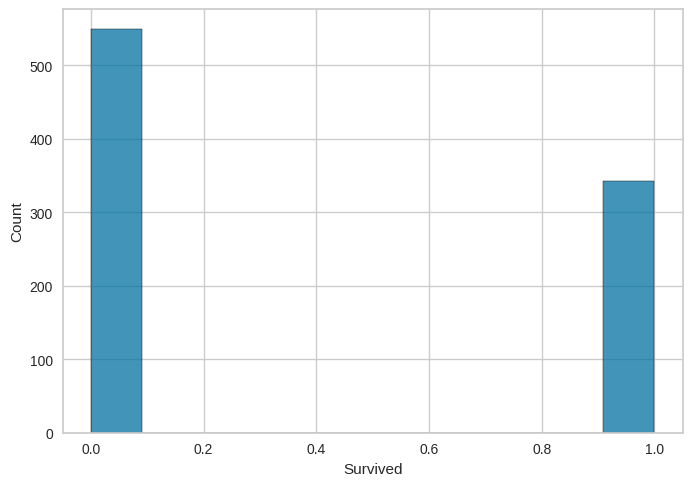

In [9]:
sns.histplot(train['Survived'])

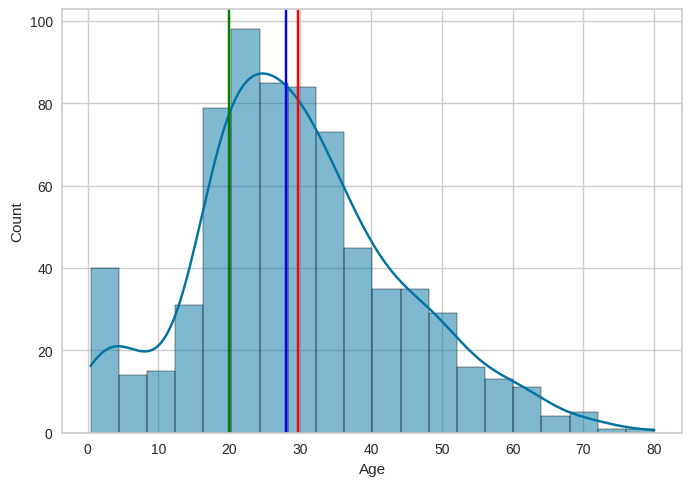

In [16]:
import matplotlib.pyplot as plt

mean = train['Age'].mean()
median = train['Age'].median()
moda = train['Age'].mode()
sns.histplot(train['Age'],kde=True)
plt.axvline(x=mean, color='red')
plt.axvline(x=median, color='blue')
plt.axvline(x=20,color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

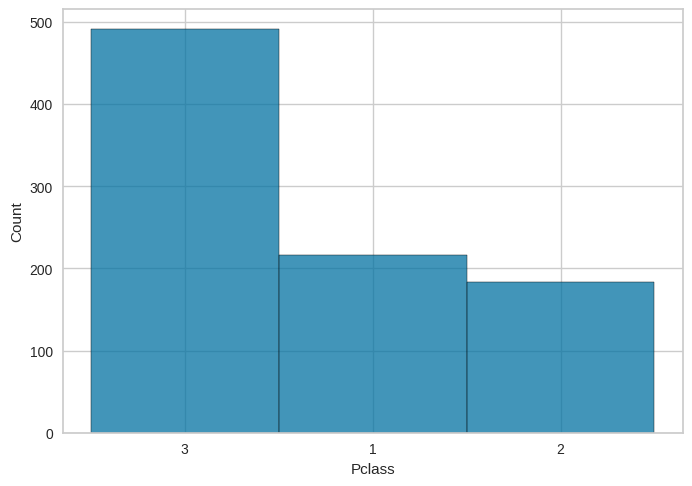

In [17]:
sns.histplot(train['Pclass'])

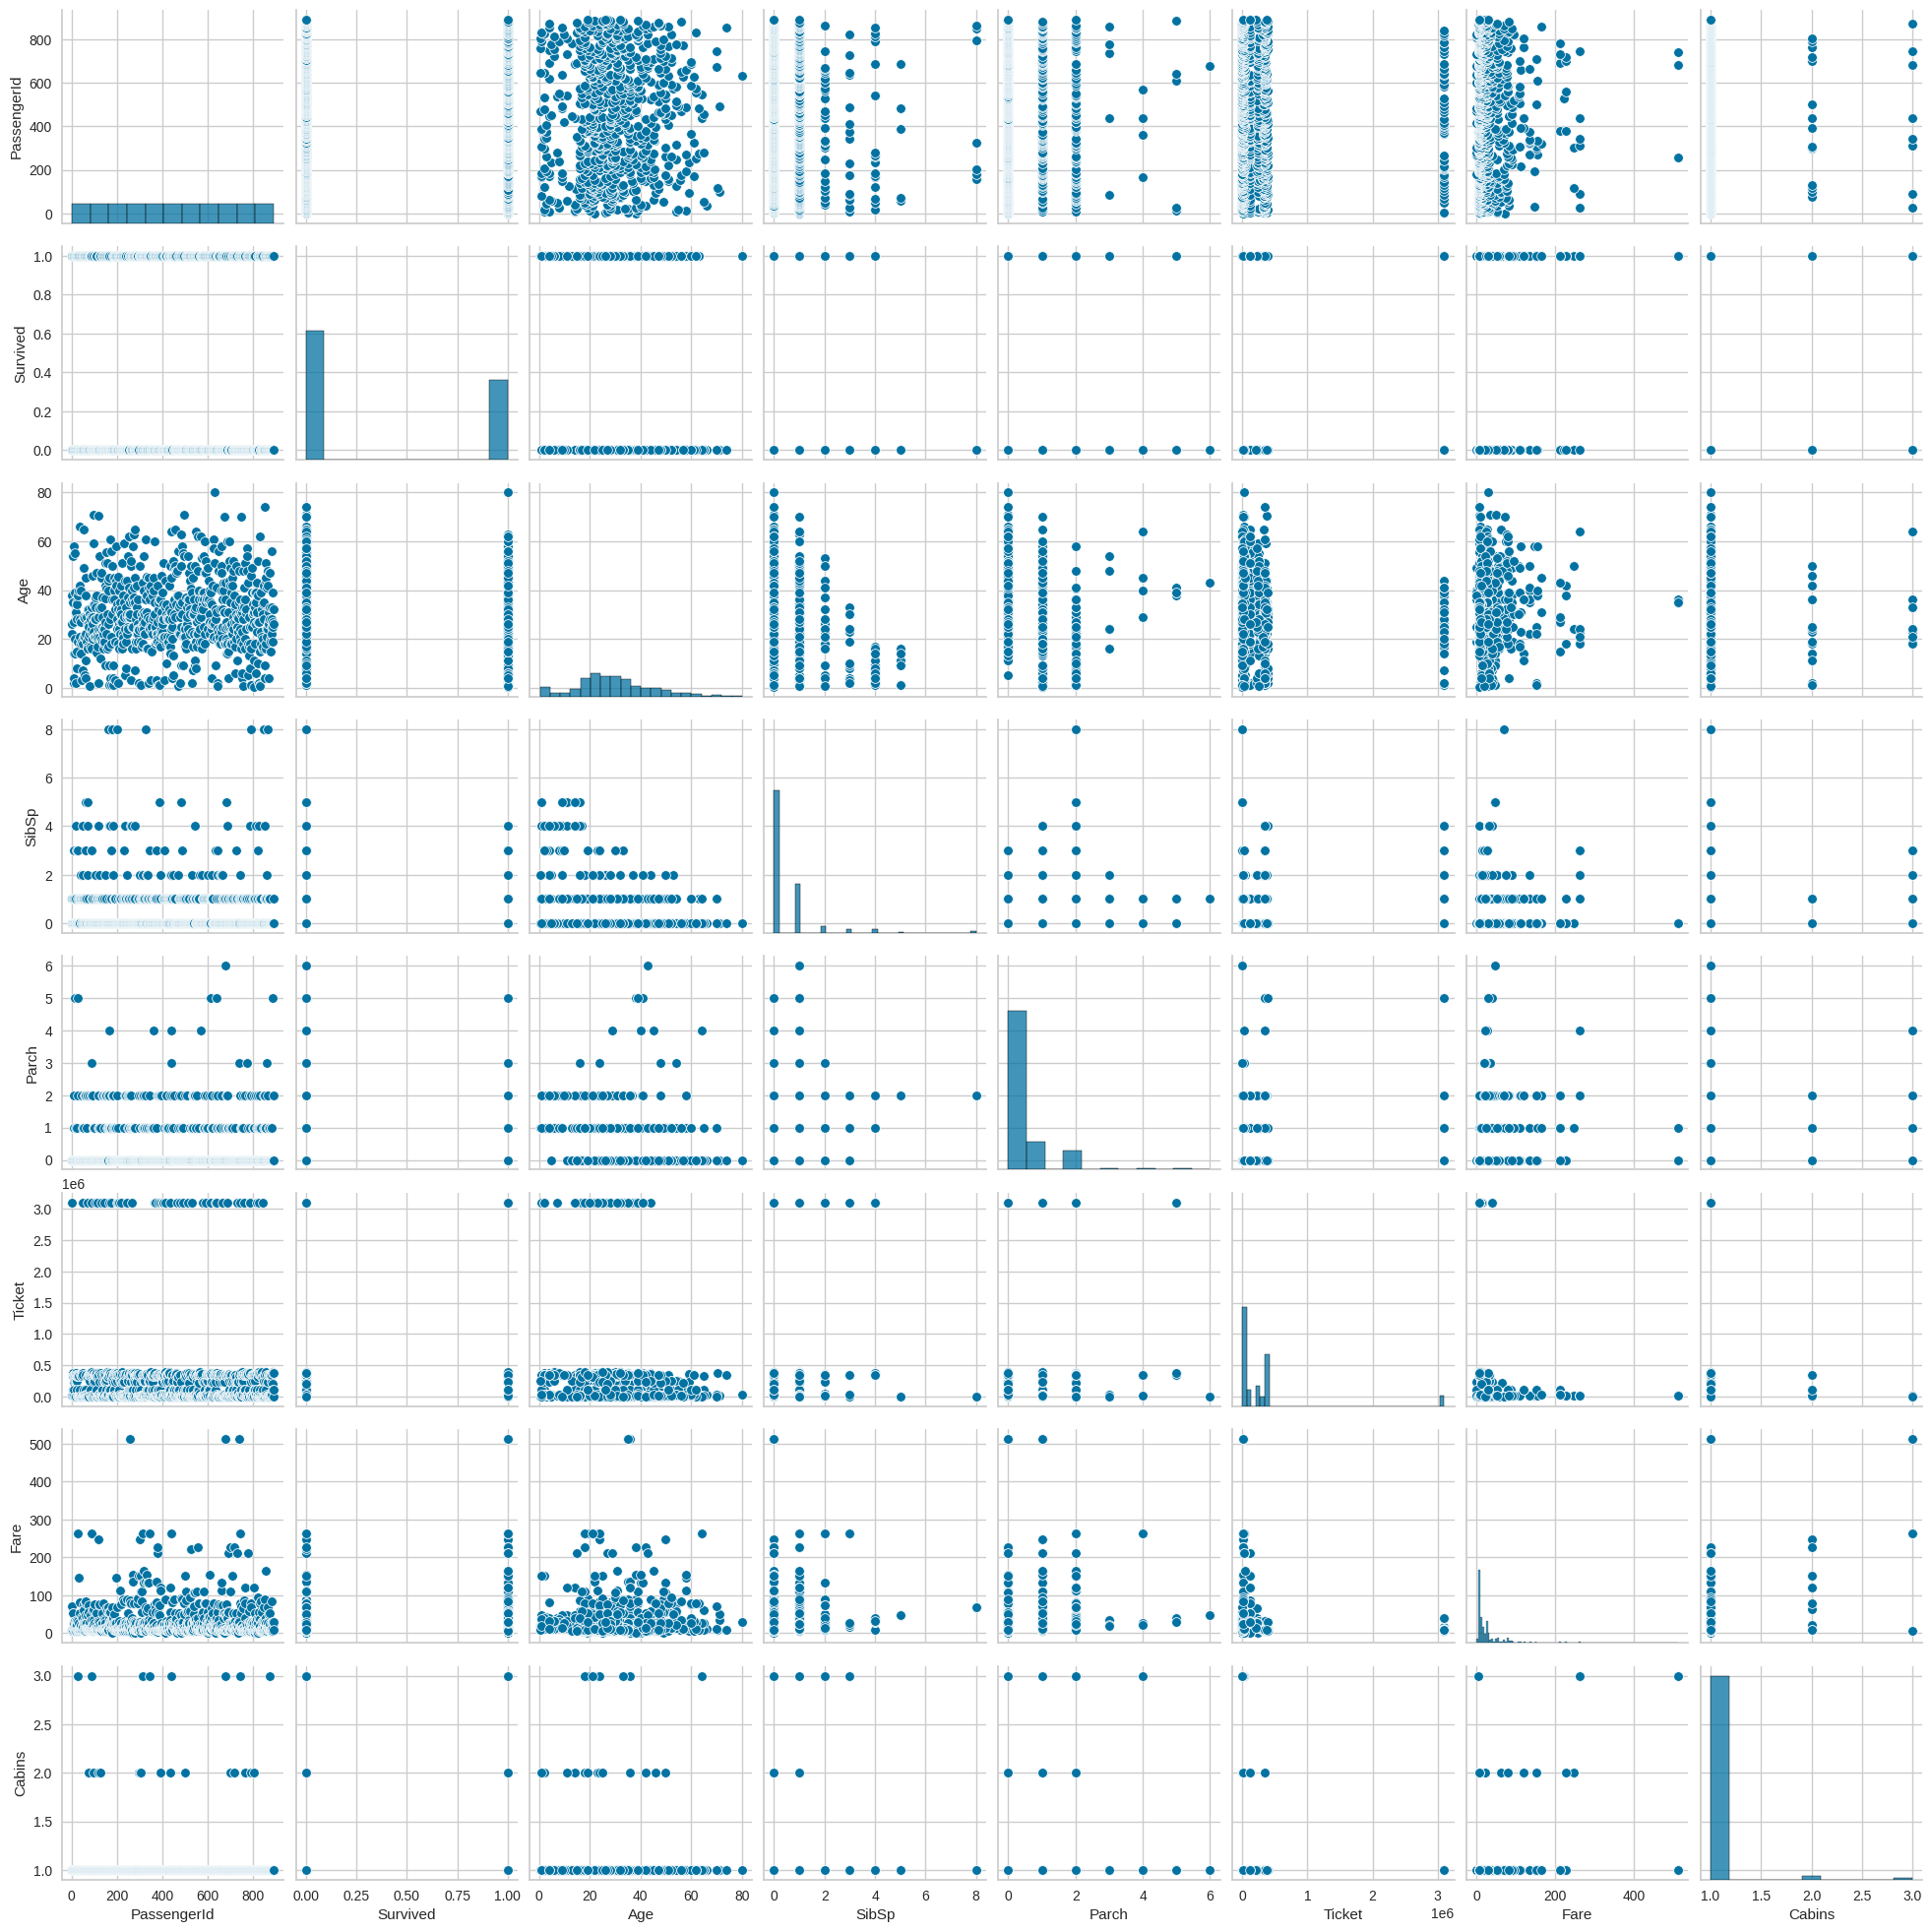

In [18]:
sns.pairplot(train)

In [19]:
s = setup(train,target='Survived',ordinal_features={'Pclass':['3','2','1'] },numeric_imputation='median',log_experiment="mlflow", experiment_name='Titanic',use_gpu=True)

,Description,Value
0,session_id,322
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 15)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,10
8,Ordinal Features,True
9,High Cardinality Features,False


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8218,0.8718,0.6695,0.8432,0.7443,0.6106,0.6219,0.2650
xgboost,Extreme Gradient Boosting,0.8138,0.8649,0.7400,0.7763,0.7553,0.6054,0.6083,0.6040
ridge,Ridge Classifier,0.8041,0.0000,0.6898,0.7839,0.7312,0.5785,0.5837,0.0450
rf,Random Forest Classifier,0.8040,0.8593,0.6528,0.8172,0.7230,0.5739,0.5851,0.3330
lightgbm,Light Gradient Boosting Machine,0.8025,0.8653,0.7315,0.7554,0.7418,0.5821,0.5839,0.0640
ada,Ada Boost Classifier,0.7930,0.8491,0.6572,0.7829,0.7116,0.5522,0.5600,0.1400
et,Extra Trees Classifier,0.7912,0.8478,0.6650,0.7725,0.7123,0.5500,0.5559,0.3590
dt,Decision Tree Classifier,0.7911,0.7743,0.6982,0.7527,0.7194,0.5543,0.5596,0.0220
nb,Naive Bayes,0.6468,0.6680,0.1570,0.6942,0.2524,0.1334,0.1950,0.0160
knn,K Neighbors Classifier,0.6290,0.6599,0.4838,0.5390,0.5046,0.2106,0.2144,0.3860


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=322, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.9252,0.8750,0.8077,0.8400,0.7350,0.7366
1,0.7778,0.8442,0.7200,0.7200,0.7200,0.5358,0.5358
2,0.8095,0.8705,0.6800,0.8095,0.7391,0.5909,0.5965
3,0.8065,0.8520,0.7917,0.7308,0.7600,0.5983,0.5996
4,0.7903,0.8158,0.6667,0.7619,0.7111,0.5477,0.5507
5,0.9194,0.9419,0.8333,0.9524,0.8889,0.8260,0.8306
6,0.7903,0.8498,0.7083,0.7391,0.7234,0.5547,0.5550
7,0.7903,0.8925,0.7917,0.7037,0.7451,0.5681,0.5709
8,0.7581,0.7950,0.6667,0.6957,0.6809,0.4862,0.4865


In [23]:
xgb_c = calibrate_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9391,0.8333,0.8000,0.8163,0.6995,0.6999
1,0.8095,0.8484,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.8254,0.8747,0.6800,0.8500,0.7556,0.6223,0.6317
3,0.8226,0.8553,0.7083,0.8095,0.7556,0.6173,0.6207
4,0.8226,0.8169,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.9032,0.9375,0.7917,0.9500,0.8636,0.7896,0.7975
6,0.7903,0.8553,0.7083,0.7391,0.7234,0.5547,0.5550
7,0.8065,0.9057,0.7500,0.7500,0.7500,0.5921,0.5921
8,0.7419,0.7829,0.5833,0.7000,0.6364,0.4389,0.4433


In [26]:
xgb_t = tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8814,0.7917,0.7308,0.7600,0.6025,0.6039
1,0.7778,0.8126,0.8000,0.6897,0.7407,0.5482,0.5528
2,0.8095,0.8495,0.7200,0.7826,0.7500,0.5966,0.5979
3,0.8065,0.8816,0.8333,0.7143,0.7692,0.6043,0.6096
4,0.7742,0.8344,0.7500,0.6923,0.7200,0.5313,0.5325
5,0.8871,0.9496,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.7742,0.8289,0.7083,0.7083,0.7083,0.5241,0.5241
7,0.8065,0.9035,0.9167,0.6875,0.7857,0.6157,0.6370
8,0.7258,0.7873,0.6667,0.6400,0.6531,0.4266,0.4268


In [27]:
evaluate_model(xgb_t)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

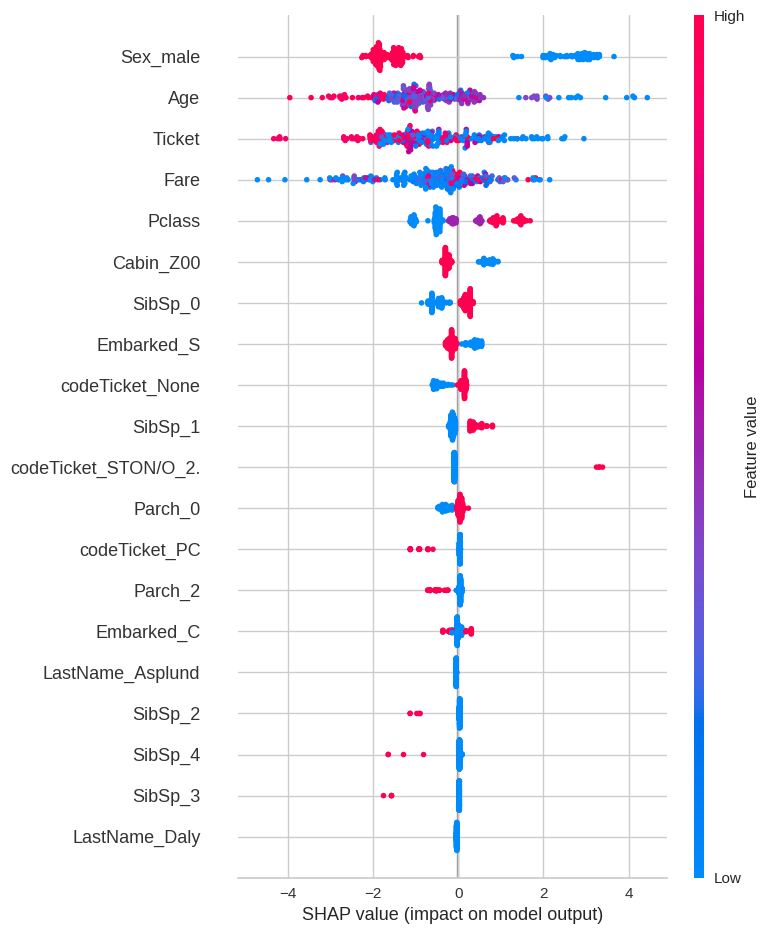

In [28]:
interpret_model(xgb_t)

In [29]:
finalize_model(xgb_t)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [30]:
save_model(xgb_t,'xgb_t')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=Non...
                                grow_policy='depthwise', importance_type=None,
                                interaction_constraints='', learning_rate=0.3,
                                max_bin=256, max_cat_threshold=64,
                                max_cat_to_onehot=4, max_delta_step=0,
            

In [31]:
test = feature_eng(test)

In [32]:
predicao = predict_model(xgb_t,test)
predicao

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabins,codeTicket,LastName,Label,Score
0,892,3,Mr. James,male,34.5,0,0,330911,7.8292,Z00,Q,1,None,Kelly,0,0.7697
1,893,3,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,Z00,S,1,None,Wilkes,0,0.5043
2,894,2,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,Z00,Q,1,None,Myles,0,0.8641
3,895,3,Mr. Albert,male,27.0,0,0,315154,8.6625,Z00,S,1,None,Wirz,1,0.7310
4,896,3,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,Z00,S,1,None,Hirvonen,1,0.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr. Woolf,male,NaN,0,0,3236,8.0500,Z00,S,1,A.5.,Spector,0,0.9884
414,1306,1,Dona. Fermina,female,39.0,0,0,17758,108.9000,C105,C,1,PC,Oliva y Ocana,1,0.9984
415,1307,3,Mr. Simon Sivertsen,male,38.5,0,0,3101262,7.2500,Z00,S,1,SOTON/O.Q.,Saether,0,0.9977
416,1308,3,Mr. Frederick,male,NaN,0,0,359309,8.0500,Z00,S,1,None,Ware,0,0.9583


In [33]:
output = pd.DataFrame({'PassengerId': predicao.PassengerId,'Survived': predicao.Label})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
output.to_csv('submission6.csv', index=False)